In [1]:
import pandas as pd
import datetime
import numpy as np


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_excel(r'C:\Users\keith\Downloads\Sample - Superstore.xls')

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
data['OrderDateMonth']=data['Order Date'].apply(lambda x:x.month)
data['OrderDateYear']=data['Order Date'].apply(lambda x :x.year)

salesMonthYear=pd.pivot_table(data,index=['OrderDateMonth'],columns=['OrderDateYear'],aggfunc='max',values='Sales')

In [13]:
salesMonthYear.size

48

In [16]:
salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,2573.820,4297.644,1592.850,5443.960
2,1256.220,2541.980,8749.950,1640.700
3,22638.480,6354.950,4912.590,13999.960
4,4164.050,3812.970,9099.930,4799.984
5,2715.930,2973.320,8399.976,3359.952
6,3266.376,3050.376,4476.800,3404.500
7,8187.650,2309.650,2799.960,2399.960
8,2060.744,3080.000,2887.056,4416.174
9,9449.950,4228.704,4355.168,4663.736


<AxesSubplot:xlabel='OrderDateMonth'>

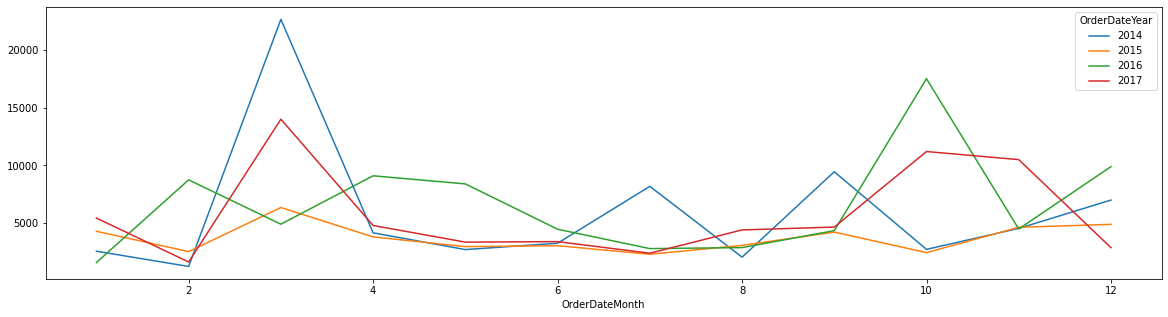

In [11]:
salesMonthYear.plot(figsize=(20,5))

In [14]:
rolling=salesMonthYear.rolling(2)

In [15]:
rolling.mean()

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,NaN,NaN,NaN
2,1915.020,3419.812,5171.4000,3542.330
3,11947.350,4448.465,6831.2700,7820.330
4,13401.265,5083.960,7006.2600,9399.972
5,3439.990,3393.145,8749.9530,4079.968
6,2991.153,3011.848,6438.3880,3382.226
7,5727.013,2680.013,3638.3800,2902.230
8,5124.197,2694.825,2843.5080,3408.067
9,5755.347,3654.352,3621.1120,4539.955


In [18]:
rolling.min()

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,NaN,NaN,NaN
2,1256.220,2541.98,1592.850,1640.700
3,1256.220,2541.98,4912.590,1640.700
4,4164.050,3812.97,4912.590,4799.984
5,2715.930,2973.32,8399.976,3359.952
6,2715.930,2973.32,4476.800,3359.952
7,3266.376,2309.65,2799.960,2399.960
8,2060.744,2309.65,2799.960,2399.960
9,2060.744,3080.00,2887.056,4416.174


<AxesSubplot:xlabel='OrderDateMonth'>

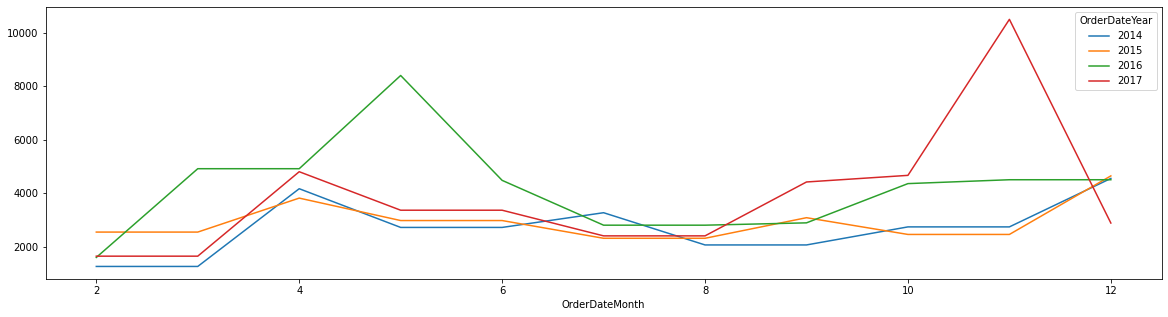

In [20]:
rolling.min().plot(figsize=(20,5))

array([<AxesSubplot:xlabel='OrderDateMonth'>,
       <AxesSubplot:xlabel='OrderDateMonth'>,
       <AxesSubplot:xlabel='OrderDateMonth'>,
       <AxesSubplot:xlabel='OrderDateMonth'>], dtype=object)

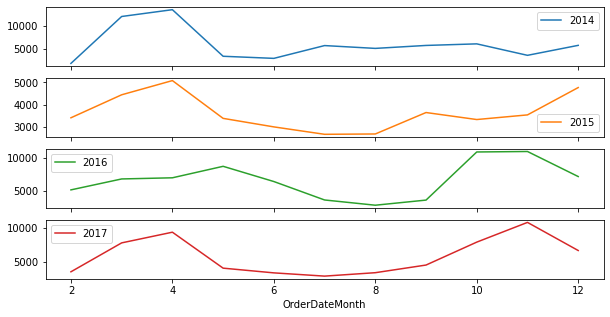

In [21]:
rolling.mean().plot(subplots=True,figsize=(10,5))

# Expanding function

In [22]:
kkk=pd.DataFrame({'a':range(10)})
kkk

,a
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [24]:
expbj=kkk.expanding(center=False,min_periods=1)
kkk['exp1']=expbj.sum()
kkk

C:\Users\keith\AppData\Local\Temp/ipykernel_3676/966836043.py:1: FutureWarning: The `center` argument on `expanding` will be removed in the future
  expbj=kkk.expanding(center=False,min_periods=1)


,a,exp1
0,0,0.0
1,1,1.0
2,2,3.0
3,3,6.0
4,4,10.0
5,5,15.0
6,6,21.0
7,7,28.0
8,8,36.0
9,9,45.0


In [28]:
expbj1=kkk[['a']].expanding(center=False,min_periods=1)
expbj1.mean()

C:\Users\keith\AppData\Local\Temp/ipykernel_3676/4276652596.py:1: FutureWarning: The `center` argument on `expanding` will be removed in the future
  expbj1=kkk[['a']].expanding(center=False,min_periods=1)


,a
0,0.0
1,0.5
2,1.0
3,1.5
4,2.0
5,2.5
6,3.0
7,3.5
8,4.0
9,4.5


In [30]:
expbj2=kkk[['a']].expanding(center=True,min_periods=1)
expbj2.mean()

C:\Users\keith\AppData\Local\Temp/ipykernel_3676/3462074059.py:1: FutureWarning: The `center` argument on `expanding` will be removed in the future
  expbj2=kkk[['a']].expanding(center=True,min_periods=1)


,a
0,0.0
1,0.5
2,1.0
3,1.5
4,2.0
5,2.5
6,3.0
7,3.5
8,4.0
9,4.5


In [33]:
a=print('Keith')

Keith


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [35]:
def test7(a,b,c,d):
    return a+b,b+c,c+d,d+a

In [36]:
x,y,z,w=test7(1,2,3,4)

In [37]:
x

3

In [42]:
[i for i in range(101) if i%3!=0 and i%5!=0]

[1,
 2,
 4,
 7,
 8,
 11,
 13,
 14,
 16,
 17,
 19,
 22,
 23,
 26,
 28,
 29,
 31,
 32,
 34,
 37,
 38,
 41,
 43,
 44,
 46,
 47,
 49,
 52,
 53,
 56,
 58,
 59,
 61,
 62,
 64,
 67,
 68,
 71,
 73,
 74,
 76,
 77,
 79,
 82,
 83,
 86,
 88,
 89,
 91,
 92,
 94,
 97,
 98]

In [45]:
def tes(*keith):
    return [keith]

In [46]:
a=tes(1,2,3,4,5)

[(1, 2, 3, 4, 5)]

In [62]:
def te(**kwargs):
    count=0
    for j in kwargs.values():
        if type(j)==list:
            for k in j:
                if type(k)==str:
                    count+=1
    return count
        
        


In [63]:
te(a=44,b=55,c=66,d=['keith','Ferns',1234])

2